In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
from itertools import *
from pylab import *

In [19]:
_METADATA_PATH = "https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather"
df = pd.read_feather(_METADATA_PATH)
#df = df[df.filing_date.astype(str).str.startswith('2016')]
df.columns

Index(['application_number', 'filing_date', 'application_invention_type',
       'examiner_full_name', 'examiner_art_unit', 'uspc_class',
       'uspc_subclass', 'confirm_number', 'atty_docket_number',
       'appl_status_desc', 'appl_status_date', 'file_location',
       'file_location_date', 'earliest_pgpub_number', 'earliest_pgpub_date',
       'wipo_pub_number', 'wipo_pub_date', 'patent_number',
       'patent_issue_date', 'invention_title', 'small_entity_indicator',
       'aia_first_to_file', 'publication_number', 'date_application_produced',
       'date_application_published', 'main_cpc_label', 'cpc_labels',
       'main_ipcr_label', 'ipcr_labels', 'foreign', 'continuation', 'decision',
       'decision_as_of_2020'],
      dtype='object')

In [20]:
df.head(10)

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,date_application_produced,date_application_published,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020
0,10018320,2004-06-29,Utility,"MITCHELL, LAURA MCGILLEM",1636,435,007400,1633.0,01-1637,Abandoned -- Failure to Respond to an Office A...,...,2005-06-01,2005-06-16,,,,,True,0,REJECTED,REJECTED
1,10018639,2004-03-15,Utility,"FOX, JOHN C",3753,137,884000,5181.0,442-134 PCT/US,Abandoned -- Failure to Respond to an Office A...,...,2005-04-06,2005-04-21,,,,,True,0,REJECTED,REJECTED
2,10048553,2004-10-18,Utility,"SAUCIER, SANDRA E",1651,435,280000,4574.0,21581/0286,Patent Expired Due to NonPayment of Maintenanc...,...,2005-03-31,2005-04-14,,,,,True,0,ACCEPTED,ACCEPTED
3,10048576,2005-03-28,Utility,"FRANCIS, FAYE",3725,241,001000,7991.0,020065,Patent Expired Due to NonPayment of Maintenanc...,...,2005-10-19,2005-11-03,,,,,False,0,ACCEPTED,ACCEPTED
4,10049016,2004-06-08,Utility,"LE, MICHAEL",2163,707,100000,5734.0,3113.2.1.1,Patented Case,...,2005-03-03,2005-03-17,,,,,False,0,ACCEPTED,ACCEPTED
5,10066553,2004-03-08,Utility,"CHAPMAN, JEANETTE E",3635,052,720100,7831.0,None,Abandoned -- Failure to Respond to an Office A...,...,2005-07-06,2005-07-21,,,,,False,0,REJECTED,REJECTED
6,10089089,2005-05-19,Utility,"SRIRAMAN, NIKHIL",3664,701,029000,4452.0,221842US2PCT,Patent Expired Due to NonPayment of Maintenanc...,...,2006-06-27,2006-07-13,,,G05D100,G05D100,True,0,PENDING,ACCEPTED
7,10129262,2004-09-10,Utility,"JARRELL, NOBLE E",1624,514,025000,7104.0,03806.0550,Abandoned -- Failure to Respond to an Office A...,...,2005-04-06,2005-04-21,,,,,True,0,REJECTED,REJECTED
8,10129429,2004-07-26,Utility,"WILSON, JOHN J",3732,433,006000,7561.0,22038,Patent Expired Due to NonPayment of Maintenanc...,...,2005-04-06,2005-04-21,,,,,True,0,ACCEPTED,ACCEPTED
9,10130697,2004-08-18,Utility,"NGUYEN, TU MINH",3748,422,173000,9155.0,R.39496,Patent Expired Due to NonPayment of Maintenanc...,...,2005-03-16,2005-03-31,,,,,True,0,ACCEPTED,ACCEPTED


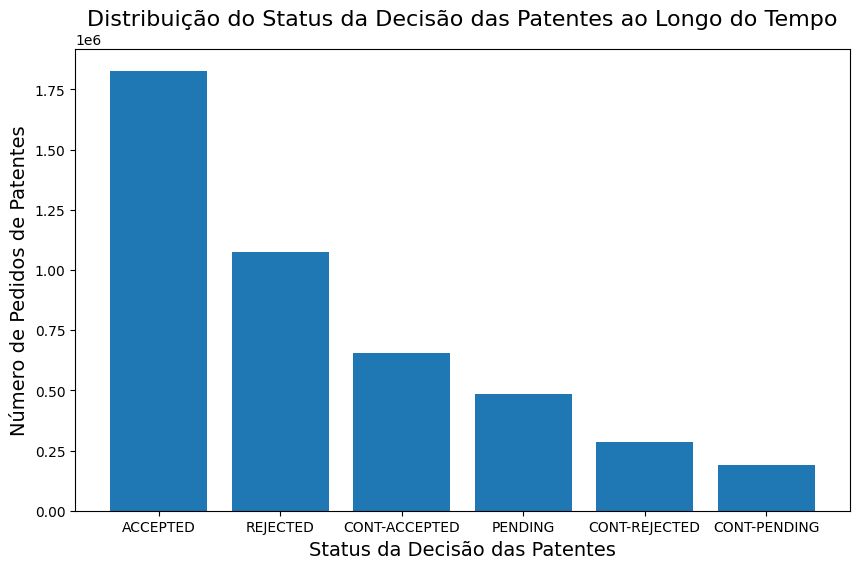

In [21]:
# Let's look at the distribution of the decision status labels
status_stats = (df.decision).value_counts().to_dict()

# Let's plot the numbers above
plt.figure(figsize=(10, 6))
plt.bar(range(len(status_stats)), list(status_stats.values()), align='center')
plt.xticks(range(len(status_stats)), list(status_stats.keys()))

# Specify the x-label, y-label, and title
plt.xlabel('Status da Decisão das Patentes', fontsize=14)
plt.ylabel('Número de Pedidos de Patentes', fontsize=14)
plt.title('Distribuição do Status da Decisão das Patentes ao Longo do Tempo', fontsize=16) 
plt.show()

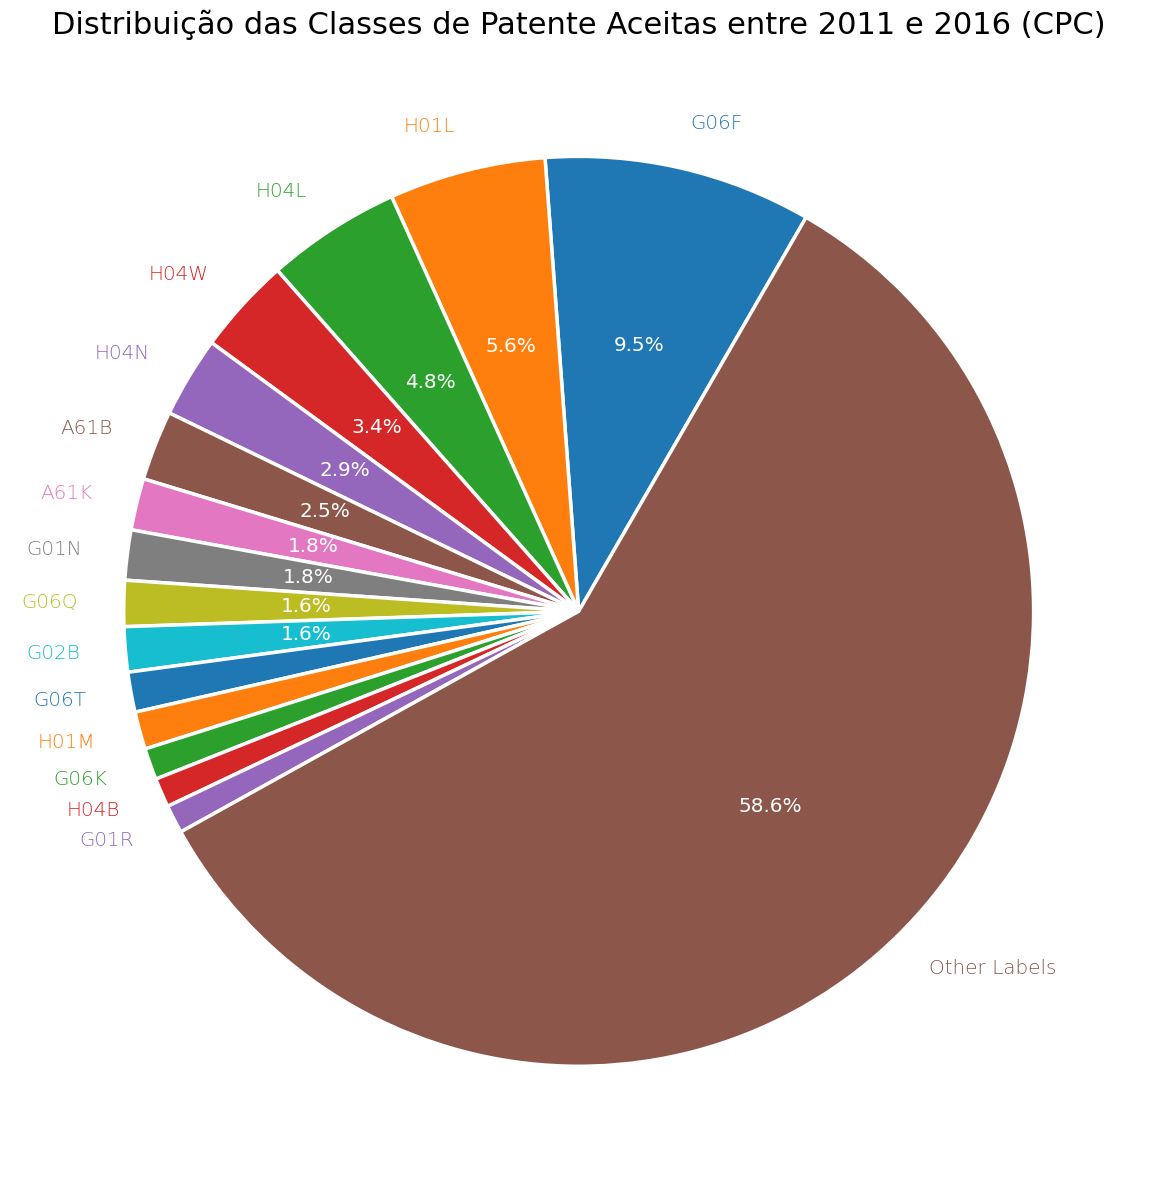

In [22]:
# Load the CPC code descriptions
cpc_titles_df = pd.read_csv("./cpc_codes/titles.csv")

df['cpc_sub'] = df.cpc_labels.str[:4]
df['ipc_sub'] = df.main_ipcr_label.str[:4]

# 2011-2016
start_date = '2011-01-01'
end_date = '2016-12-31'

df_2011_2016 = df[df['filing_date'] >= start_date]
df_2011_2016 = df_2011_2016[df_2011_2016['filing_date'] <= end_date]

# Using CPC Labels (could be better IPC considering 2011/2012)
accepted_df_2011_2016 = df_2011_2016[df_2011_2016.decision == 'ACCEPTED']

accepted_df_2011_2016_cpc_sub = accepted_df_2011_2016.cpc_sub.value_counts().to_dict()
accepted_df_2011_2016_ipc_sub = accepted_df_2011_2016.ipc_sub.value_counts().to_dict()

cpc_counts_df = pd.DataFrame(list(accepted_df_2011_2016_cpc_sub.items()), columns=['code', 'count'])
ipc_counts_df = pd.DataFrame(list(accepted_df_2011_2016_ipc_sub.items()), columns=['code', 'count'])

merged_df = pd.merge(cpc_counts_df, cpc_titles_df, on='code', how='inner')
merged_ipc_df = pd.merge(ipc_counts_df, cpc_titles_df, on='code', how='inner')

_THRESHOLD = 15
chart_values = merged_df['count'].head(_THRESHOLD).tolist()
chart_labels = merged_df['code'].head(_THRESHOLD).tolist()
chart_values.append(merged_df['count'][_THRESHOLD:].sum())
chart_labels.append('Other Labels')

fig, ax = plt.subplots(figsize=(12, 12))

patches, texts, pcts = ax.pie(
    chart_values, labels=chart_labels, autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 1.5 else '',
    wedgeprops={'linewidth': 2.5, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=60)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=6)
ax.set_title('Distribuição das Classes de Patente Aceitas entre 2011 e 2016 (CPC)', fontsize=22)
plt.tight_layout()
plt.savefig("graficos/top15_total_aceitas2011-2016_CPC.png", dpi=300, bbox_inches='tight')
plt.show()

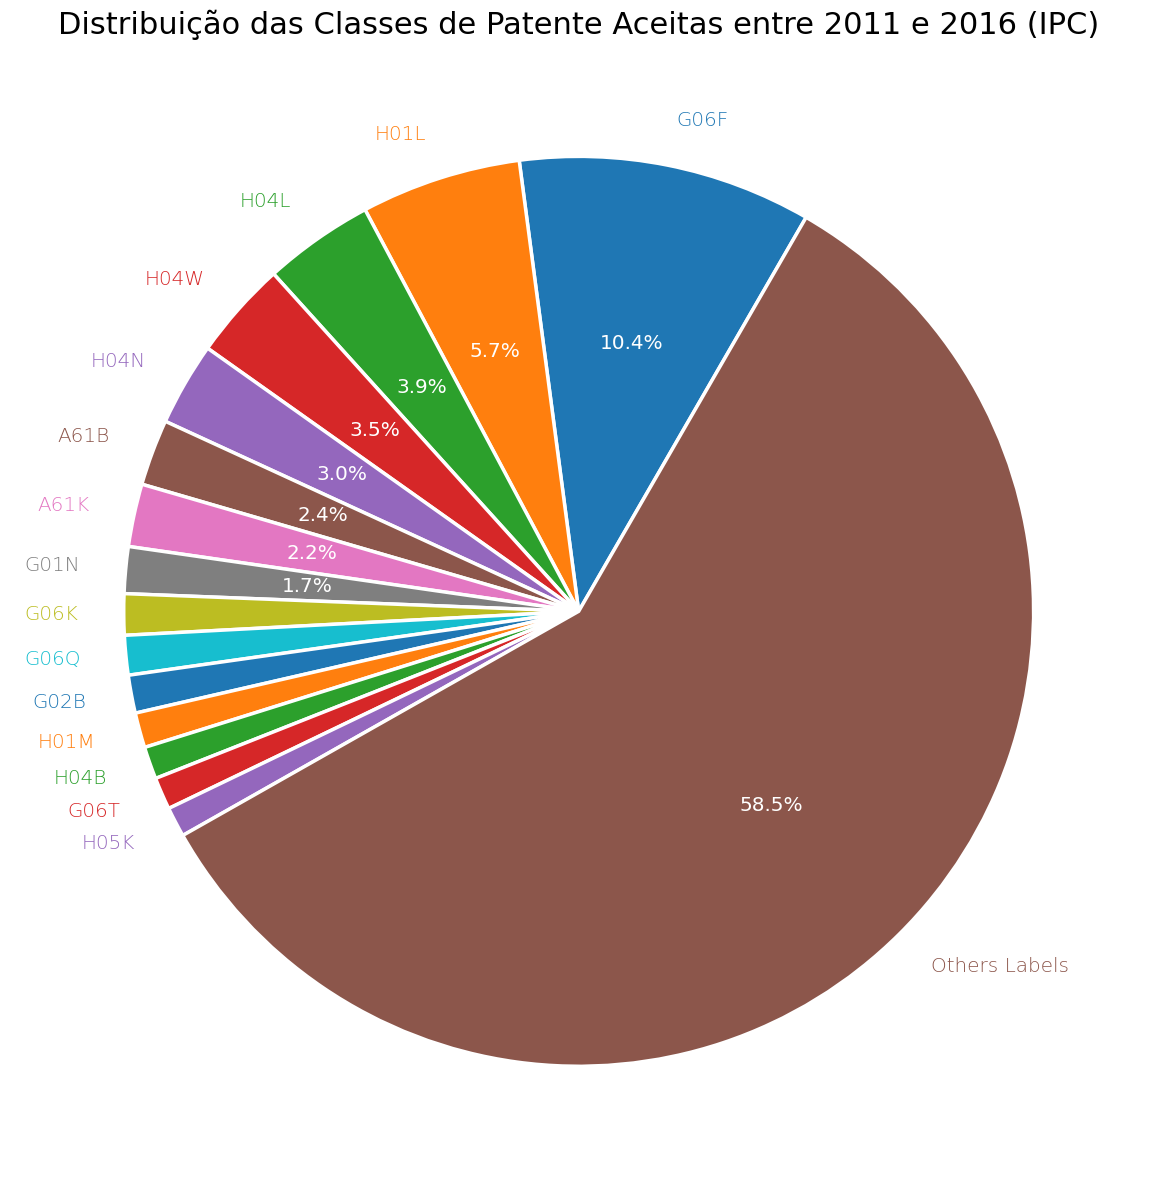

In [23]:
_THRESHOLD = 15
chart_values = merged_ipc_df['count'].head(_THRESHOLD).tolist()
chart_labels = merged_ipc_df['code'].head(_THRESHOLD).tolist()
chart_values.append(merged_ipc_df['count'][_THRESHOLD:].sum())
chart_labels.append('Others Labels')

fig, ax = plt.subplots(figsize=(12, 12))

patches, texts, pcts = ax.pie(
    chart_values, labels=chart_labels, autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 1.5 else '',
    wedgeprops={'linewidth': 2.5, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=60)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=6)
ax.set_title('Distribuição das Classes de Patente Aceitas entre 2011 e 2016 (IPC)', fontsize=22)
plt.tight_layout()
plt.savefig("graficos/top15_total_aceitas2011-2016_IPC.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
table_data = merged_df[['code', 'title']].head(_THRESHOLD)
table_data.columns = ['Code', 'Description'] 
table_data.style.set_properties(**{'text-align': 'left', 'white-space': 'normal'})

,Code,Description
0,G06F,ELECTRIC DIGITAL DATA PROCESSING (computer systems based on specific computational models G06N)
1,H01L,"SEMICONDUCTOR DEVICES; ELECTRIC SOLID STATE DEVICES NOT OTHERWISE PROVIDED FOR (use of semiconductor devices for measuring G01; resistors in general H01C; magnets, inductors, transformers H01F; capacitors in general H01G; electrolytic devices H01G9/00; batteries, accumulators H01M; waveguides, resonators, or lines of the waveguide type H01P; line connectors, current collectors H01R; stimulated-emission devices H01S; electromechanical resonators H03H; loudspeakers, microphones, gramophone pick-ups or like acoustic electromechanical transducers H04R; electric light sources in general H05B; printed circuits, hybrid circuits, casings or constructional details of electrical apparatus, manufacture of assemblages of electrical components H05K; use of semiconductor devices in circuits having a particular application, see the subclass for the application)"
2,H04L,"TRANSMISSION OF DIGITAL INFORMATION, e.g. TELEGRAPHIC COMMUNICATION ({coding or ciphering apparatus for cryptographic or other purposes involving the need for secrecy G09C;} arrangements common to telegraphic and telephonic communication H04M)"
3,H04W,"WIRELESS COMMUNICATION NETWORKS (broadcast communication H04H; communication systems using wireless links for non-selective communication, e.g. wireless extensions H04M1/72)"
4,H04N,"PICTORIAL COMMUNICATION, e.g. TELEVISION"
5,A61B,"DIAGNOSIS; SURGERY; IDENTIFICATION (analysing biological material G01N, e.g. G01N33/48; obtaining records using waves other than optical waves, in general G03B42/00)"
6,A61K,"PREPARATIONS FOR MEDICAL, DENTAL, OR TOILET PURPOSES (devices or methods specially adapted for bringing pharmaceutical products into particular physical or administering forms A61J3/00; chemical aspects of, or use of materials for deodorisation of air, for disinfection or sterilisation, or for bandages, dressings, absorbent pads or surgical articles A61L; soap compositions C11D)"
7,G01N,"INVESTIGATING OR ANALYSING MATERIALS BY DETERMINING THEIR CHEMICAL OR PHYSICAL PROPERTIES (measuring or testing processes other than immunoassay, involving enzymes or microorganisms C12M, C12Q)"
8,G06Q,"DATA PROCESSING SYSTEMS OR METHODS, SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES; SYSTEMS OR METHODS SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES, NOT OTHERWISE PROVIDED FOR"
9,G02B,"OPTICAL ELEMENTS, SYSTEMS OR APPARATUS"


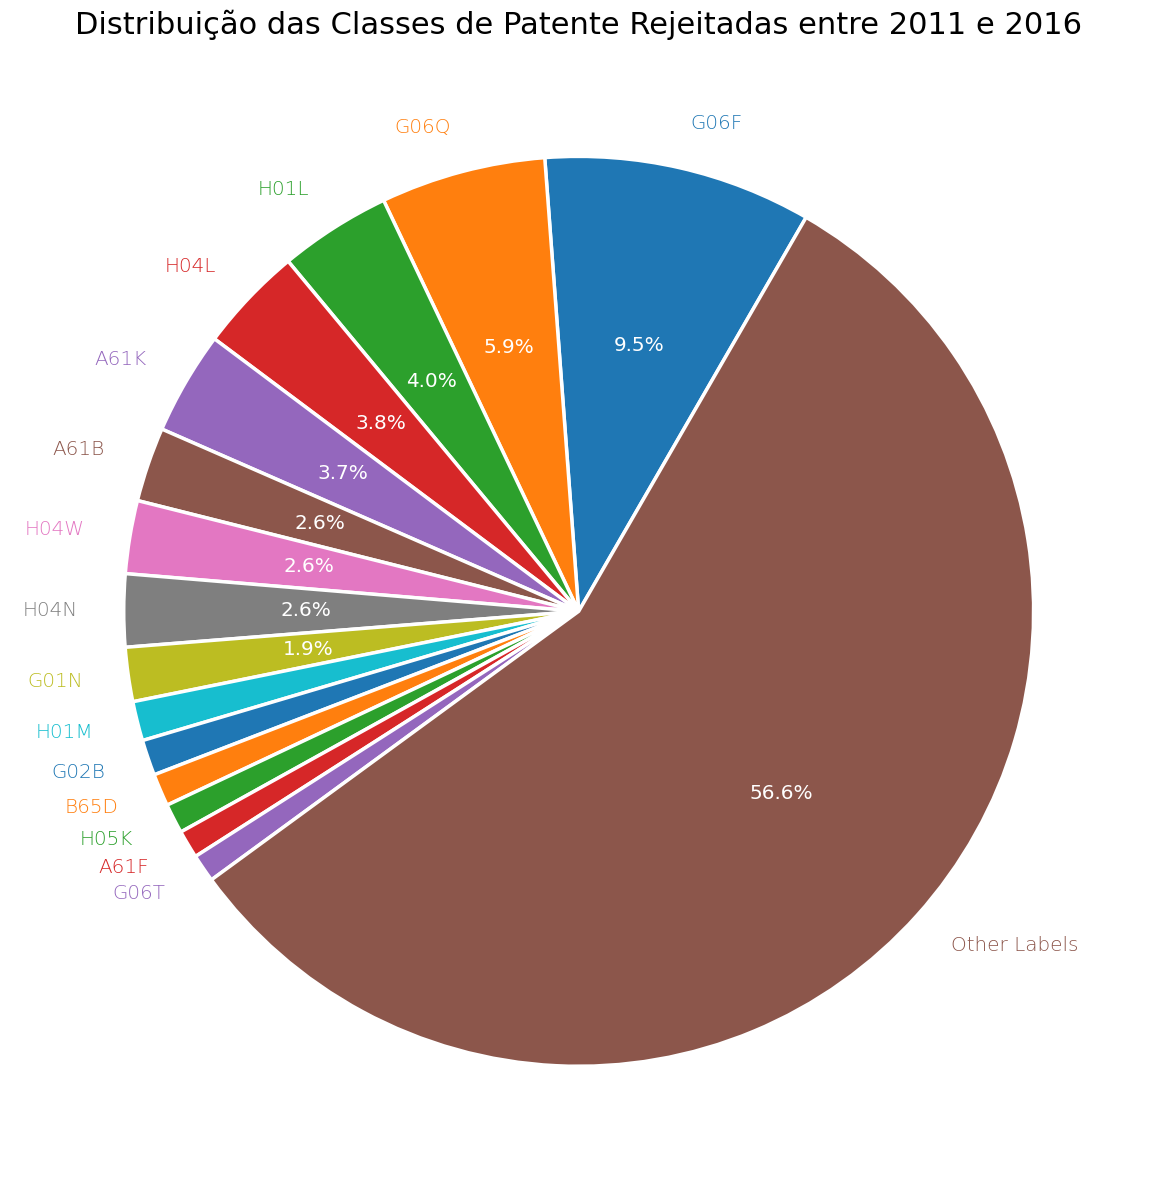

In [25]:
rejected_df_2011_2016 = df_2011_2016[df_2011_2016.decision == 'REJECTED']
rejected_df_2011_2016_cpc_sub = rejected_df_2011_2016.cpc_sub.value_counts().to_dict()
cpc_counts_df = pd.DataFrame(list(rejected_df_2011_2016_cpc_sub.items()), columns=['code', 'count'])

merged_df = pd.merge(cpc_counts_df, cpc_titles_df, on='code', how='inner')

chart_values = merged_df['count'].head(_THRESHOLD).tolist()
chart_labels = merged_df['code'].head(_THRESHOLD).tolist()
chart_values.append(merged_df['count'][_THRESHOLD:].sum())
chart_labels.append('Other Labels')

# Now, let's plot the distribution of CPC categories of "rejected" patent applications from 2011 to 2016
fig, ax = plt.subplots(figsize=(12, 12))

patches, texts, pcts = ax.pie(
    chart_values, labels=chart_labels, autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 1.5 else '',
    wedgeprops={'linewidth': 2.5, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=60)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=6)
ax.set_title('Distribuição das Classes de Patente Rejeitadas entre 2011 e 2016', fontsize=22)
plt.tight_layout()
plt.show()

In [26]:
table_data = merged_df[['code', 'title']].head(_THRESHOLD)
table_data.columns = ['Code', 'Description'] 

table_data.style.set_properties(**{'text-align': 'left', 'white-space': 'normal'})

,Code,Description
0,G06F,ELECTRIC DIGITAL DATA PROCESSING (computer systems based on specific computational models G06N)
1,G06Q,"DATA PROCESSING SYSTEMS OR METHODS, SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES; SYSTEMS OR METHODS SPECIALLY ADAPTED FOR ADMINISTRATIVE, COMMERCIAL, FINANCIAL, MANAGERIAL, SUPERVISORY OR FORECASTING PURPOSES, NOT OTHERWISE PROVIDED FOR"
2,H01L,"SEMICONDUCTOR DEVICES; ELECTRIC SOLID STATE DEVICES NOT OTHERWISE PROVIDED FOR (use of semiconductor devices for measuring G01; resistors in general H01C; magnets, inductors, transformers H01F; capacitors in general H01G; electrolytic devices H01G9/00; batteries, accumulators H01M; waveguides, resonators, or lines of the waveguide type H01P; line connectors, current collectors H01R; stimulated-emission devices H01S; electromechanical resonators H03H; loudspeakers, microphones, gramophone pick-ups or like acoustic electromechanical transducers H04R; electric light sources in general H05B; printed circuits, hybrid circuits, casings or constructional details of electrical apparatus, manufacture of assemblages of electrical components H05K; use of semiconductor devices in circuits having a particular application, see the subclass for the application)"
3,H04L,"TRANSMISSION OF DIGITAL INFORMATION, e.g. TELEGRAPHIC COMMUNICATION ({coding or ciphering apparatus for cryptographic or other purposes involving the need for secrecy G09C;} arrangements common to telegraphic and telephonic communication H04M)"
4,A61K,"PREPARATIONS FOR MEDICAL, DENTAL, OR TOILET PURPOSES (devices or methods specially adapted for bringing pharmaceutical products into particular physical or administering forms A61J3/00; chemical aspects of, or use of materials for deodorisation of air, for disinfection or sterilisation, or for bandages, dressings, absorbent pads or surgical articles A61L; soap compositions C11D)"
5,A61B,"DIAGNOSIS; SURGERY; IDENTIFICATION (analysing biological material G01N, e.g. G01N33/48; obtaining records using waves other than optical waves, in general G03B42/00)"
6,H04W,"WIRELESS COMMUNICATION NETWORKS (broadcast communication H04H; communication systems using wireless links for non-selective communication, e.g. wireless extensions H04M1/72)"
7,H04N,"PICTORIAL COMMUNICATION, e.g. TELEVISION"
8,G01N,"INVESTIGATING OR ANALYSING MATERIALS BY DETERMINING THEIR CHEMICAL OR PHYSICAL PROPERTIES (measuring or testing processes other than immunoassay, involving enzymes or microorganisms C12M, C12Q)"
9,H01M,"PROCESSES OR MEANS, e.g. BATTERIES, FOR THE DIRECT CONVERSION OF CHEMICAL ENERGY INTO ELECTRICAL ENERGY"


In [27]:
top5_codes = ["G06F", "G06Q", "H01L", "A61K", "H04L"]
results = []

for year in range(2011, 2017):  
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"

    df_year = df[df['filing_date'] >= start_date]
    df_year = df_year[df_year['filing_date'] <= end_date]

    accepted_df_year = df_year[df_year.decision == 'ACCEPTED']

    # Counts the number of times each unique CPC subclass appears in the cpc_sub column of the accepted patents DataFrame.
    accepted_df_year_cpc_sub = accepted_df_year.cpc_sub.value_counts().to_dict()
    print(accepted_df_year_cpc_sub)

{'': 147145, 'G06F': 57, 'H04L': 28, 'H01L': 26, 'H04W': 18, 'A61B': 15, 'H04N': 12, 'G06Q': 12, 'G01N': 11, 'A61K': 11, 'G06T': 11, 'B01D': 11, 'G01S': 9, 'F01N': 9, 'H02P': 8, 'C12N': 8, 'C12Q': 8, 'H01M': 7, 'G06N': 7, 'C07K': 7, 'B62D': 7, 'G01C': 6, 'G11C': 6, 'G05F': 5, 'G02B': 5, 'G06K': 5, 'C12P': 4, 'C07D': 3, 'A61M': 3, 'B01L': 3, 'E21B': 3, 'H01Q': 3, 'B01J': 3, 'B60R': 3, 'G09G': 3, 'C08G': 3, 'A47J': 3, 'G09B': 3, 'F16H': 3, 'H01F': 3, 'A61F': 3, 'F21V': 3, 'A63F': 3, 'H04B': 3, 'G02F': 3, 'F02C': 3, 'B64C': 3, 'H01H': 3, 'F04B': 3, 'B60W': 2, 'B22C': 2, 'A61N': 2, 'A63B': 2, 'A47L': 2, 'C08F': 2, 'H01B': 2, 'C08L': 2, 'C09K': 2, 'H04M': 2, 'H01G': 2, 'H02J': 2, 'H01J': 2, 'G10K': 2, 'G01T': 2, 'A63H': 2, 'H03K': 2, 'H04J': 2, 'H04K': 2, 'F41G': 2, 'G08B': 2, 'F02K': 2, 'B29C': 2, 'E02D': 2, 'A01K': 2, 'F02D': 2, 'F02B': 2, 'C09D': 2, 'A61C': 2, 'G10D': 2, 'H05B': 2, 'F01L': 2, 'G01R': 2, 'B25B': 2, 'A45D': 2, 'F42B': 2, 'H01S': 2, 'G07F': 2, 'G11B': 2, 'C07H': 2, 'G05D': 

### Notamos que no ano de 2011 e de 2012, a coluna de "cpc_sub" está vazia. Isto se da ao fato que o sistema Cooperative Patent Classification (CPC) surgiu em janeiro de 2013. Logo, como estamos concentrando em uma classifição mais generalizada (com 4 caracteres, G06F e não G06F 1/16, por exemplo), utilizaremos IPC pois representará os anos de 2011 e 2012 melhor. 

In [28]:
top5_codes = ["G06F", "G06Q", "H01L", "A61K", "H04L"]
results_accepted = []

for year in range(2011, 2017):  
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"

    df_year = df[df['filing_date'] >= start_date]
    df_year = df_year[df_year['filing_date'] <= end_date]

    accepted_df_year = df_year[df_year.decision == 'ACCEPTED']

    # Counts the number of times each unique IPC subclass appears in the cpc_sub column of the accepted patents DataFrame.
    accepted_amount_total = len(accepted_df_year)
    accepted_df_year_ipc_sub = accepted_df_year['ipc_sub'].value_counts()
    print(accepted_df_year_ipc_sub.to_dict())

    for code in top5_codes:
        count = accepted_df_year_ipc_sub.get(code, 0)
        
        percent = (count / accepted_amount_total) * 100
        results_accepted.append({
            'year': year,
            'code': code,
            'percent': percent
        })

# print(f"Results: {results_accepted}")


{'G06F': 18119, 'H01L': 8971, 'H04W': 4986, 'A61K': 4883, 'H04N': 4807, 'A61B': 3176, 'G06K': 3157, 'H04L': 3053, 'H04B': 2028, 'G01N': 2027, 'H05K': 1799, 'G02B': 1767, 'B32B': 1742, 'G09G': 1639, 'G03G': 1620, 'B41J': 1617, 'H01M': 1582, 'G11C': 1490, 'G01R': 1441, 'H01R': 1403, 'E21B': 1363, 'G06Q': 1357, 'B65D': 1258, 'G02F': 1243, 'A61M': 1202, 'A61F': 1128, 'H05B': 1101, 'B01D': 1092, 'H02J': 996, 'F21V': 989, 'C07C': 895, 'H02K': 862, 'G11B': 844, 'H01J': 820, 'G06T': 792, 'F16H': 769, 'H03K': 756, 'G03B': 728, 'F01D': 701, 'G05F': 669, 'H04R': 668, 'A63F': 665, 'A63B': 627, 'B29C': 620, 'H03M': 606, 'F16K': 606, 'A61N': 604, 'B62D': 602, 'B60R': 596, 'H01Q': 595, 'G08B': 578, 'C12Q': 555, 'G01B': 545, 'A01H': 532, 'H02P': 521, 'H01H': 520, 'G01S': 507, 'G01C': 496, 'F16L': 494, 'C08L': 493, 'H02M': 486, 'C07D': 480, 'H04J': 469, 'B65H': 464, 'B65G': 462, 'G01J': 435, 'G05B': 424, 'A01N': 422, 'C12N': 406, 'F16D': 405, 'H03F': 403, 'B01J': 403, 'G05D': 397, 'B65B': 392, 'C12P': 

### Agora utilizando IPC label, é possível perceber uma uniformidade maior, com valores vazios não aparecendo no topo.

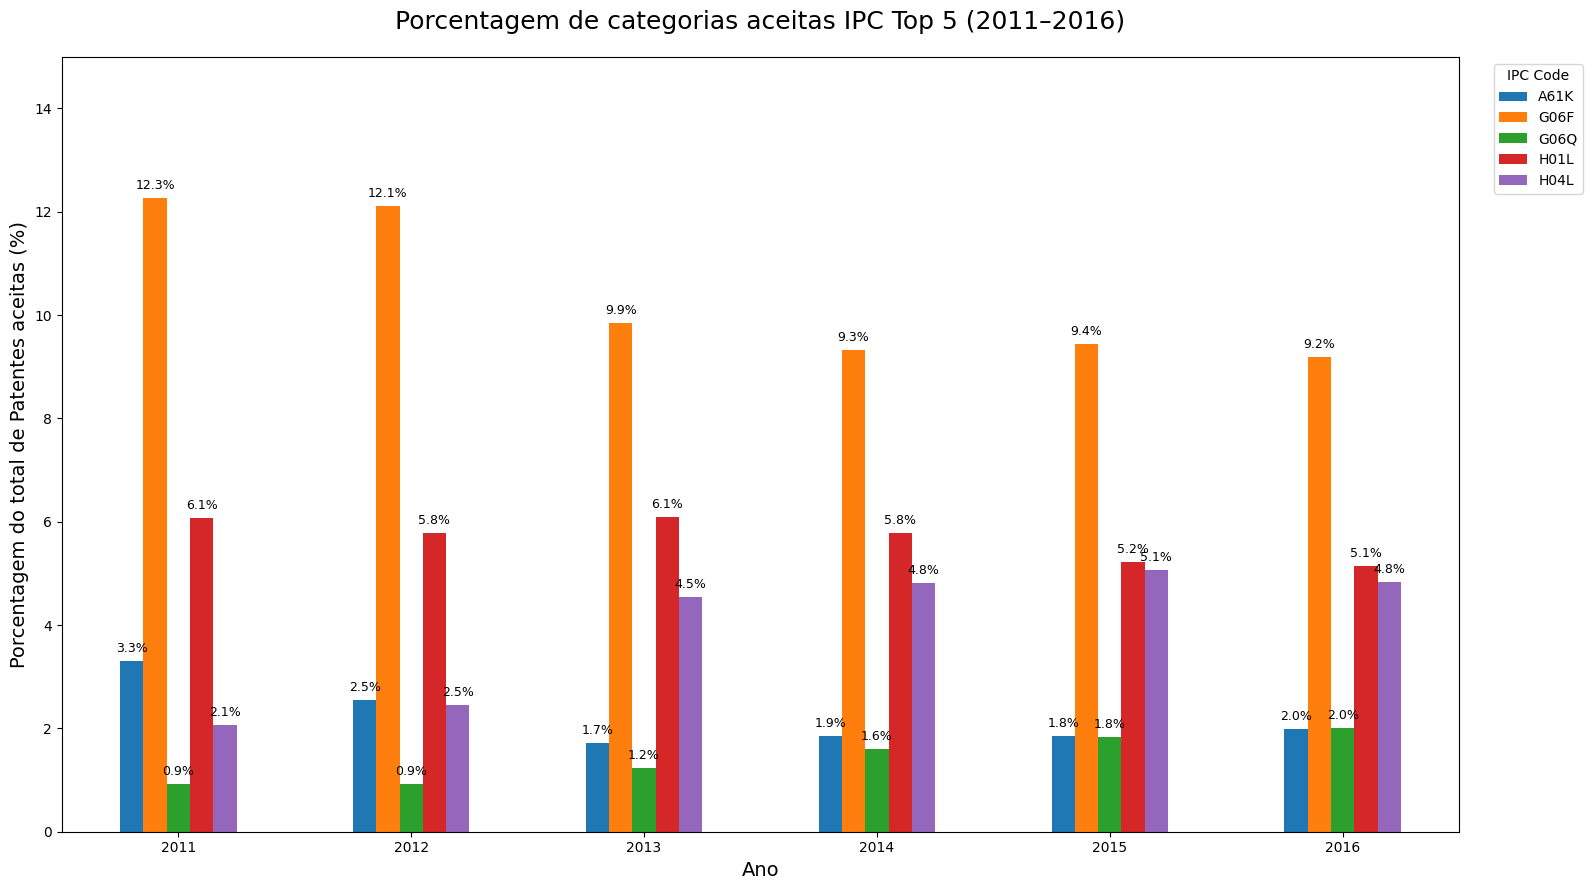

In [29]:
# Convert the list of results into a DataFrame
results_accepted_df = pd.DataFrame(results_accepted)

pivot_df = results_accepted_df.pivot(index="year", columns="code", values="percent").fillna(0)

ax = pivot_df.plot(kind="bar", figsize=(16, 9))

plt.title("Porcentagem de categorias aceitas IPC Top 5 (2011–2016)", fontsize=18, pad=20)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Porcentagem do total de Patentes aceitas (%)", fontsize=14)
plt.xticks(rotation=0) 

plt.ylim(0, 15)
plt.legend(title="IPC Code", bbox_to_anchor=(1.02, 1), loc='upper left')

# Percentage value on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=9,
                color='black')

plt.tight_layout()
plt.savefig("graficos/top5_aceitas2011-2016.png", dpi=300, bbox_inches='tight')
plt.show()

### Analisando agora o comportamento do top 5 sem necessariamente serem aceitas.

In [30]:
top5_codes = ["G06F", "G06Q", "H01L", "A61K", "H04L"]
results = []

for year in range(2011, 2017):  
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"

    df_year = df[df['filing_date'] >= start_date]
    df_year = df_year[df_year['filing_date'] <= end_date]

    # Counts the number of times each unique IPC subclass appears in the cpc_sub column of the accepted patents DataFrame.
    amount_total = len(df_year)
    df_year_ipc_sub = df_year['ipc_sub'].value_counts()
    print(df_year_ipc_sub.to_dict())

    for code in top5_codes:
        count = df_year_ipc_sub.get(code, 0)
        
        percent = (count / amount_total) * 100
        results.append({
            'year': year,
            'code': code,
            'percent': percent
        })

# print(f"Results: {results}")


{'G06F': 36652, 'H01L': 19361, 'A61K': 16219, 'H04N': 9936, 'H04W': 9343, 'A61B': 8312, 'G06Q': 7911, 'H04L': 5862, 'G06K': 5502, 'B32B': 4641, 'G01N': 4320, 'H04B': 3668, 'H05K': 3646, 'G09G': 3572, 'H01M': 3451, 'A61F': 3423, 'G02B': 3325, 'B65D': 3307, 'A61M': 3197, 'G11C': 2693, 'B41J': 2551, 'E21B': 2430, 'G03G': 2414, 'G01R': 2402, 'G02F': 2360, 'H01R': 2277, 'B01D': 2258, 'H05B': 2002, 'C12Q': 1941, 'F21V': 1931, 'H02J': 1864, 'A63B': 1847, 'A63F': 1831, 'C07C': 1629, 'G06T': 1564, 'G11B': 1552, 'A61N': 1548, 'H02K': 1542, 'H01J': 1441, 'B29C': 1434, 'C40B': 1429, 'G03B': 1424, 'C12N': 1407, 'G08B': 1292, 'H04R': 1269, 'F16H': 1263, 'H03K': 1217, 'F01D': 1164, 'A01N': 1139, 'C07D': 1124, 'C08L': 1110, 'H01Q': 1092, 'C12P': 1083, 'G05F': 1066, 'F16K': 1052, 'F16L': 1049, 'B05D': 1026, 'B60R': 996, 'H03M': 968, 'B01J': 959, 'B62D': 951, 'C23C': 942, 'G01C': 910, 'G01B': 895, 'A01K': 883, 'A01H': 874, 'B65B': 871, 'G10L': 863, 'B23P': 857, 'H01H': 840, 'H04J': 839, 'G01S': 829, 'H0

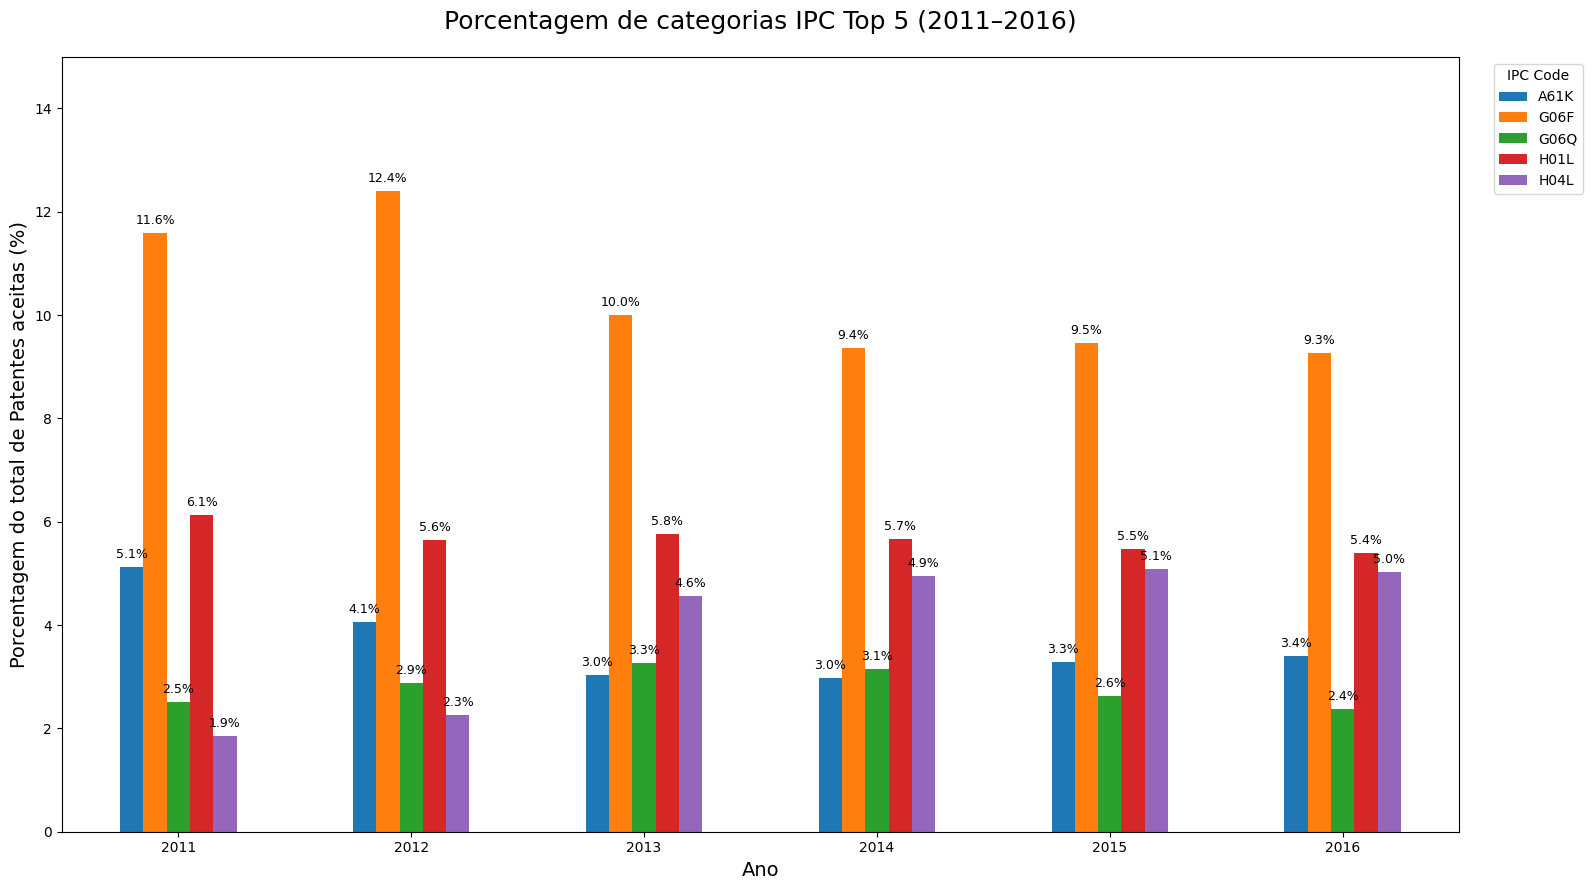

In [31]:
# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results)
pivot_df = results_df.pivot(index="year", columns="code", values="percent").fillna(0)

ax = pivot_df.plot(kind="bar", figsize=(16, 9))

plt.title("Porcentagem de categorias IPC Top 5 (2011–2016)", fontsize=18, pad=20)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Porcentagem do total de Patentes aceitas (%)", fontsize=14)
plt.xticks(rotation=0) 

plt.ylim(0, 15)
plt.legend(title="IPC Code", bbox_to_anchor=(1.02, 1), loc='upper left')

# Percentage value on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=9,
                color='black')

plt.tight_layout()
plt.savefig("graficos/top5_geral2011-2016.png", dpi=300, bbox_inches='tight')
plt.show()